# Reconhecimento de imagens

In [48]:
from sklearn import datasets
digits = datasets.load_digits()

In [49]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [50]:
#Representação 8x8 de uma imagem
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


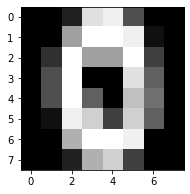

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(3,3))
plt.imshow(digits.images[55], cmap='gray')

#### Treinando modelos
##### Aplicação do SVM

In [52]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


svm: Support Vector Machine
ele cria uma reta entre os dados para divididos de forma simétrica, podendo assim classificá-los: https://en.wikipedia.org/wiki/Support-vector_machine

In [53]:

from sklearn import svm

classifier = svm.SVC()

classifier.fit(x_train, y_train)

y_prev = classifier.predict(x_test)

from sklearn import metrics

acertos = metrics.accuracy_score(y_test,y_prev)
print(acertos)

0.9851851851851852


#### Leitura da imagem de um dígito 

In [61]:
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('img/number.png')
#print(img)

def rgb2gray(rgb):
    #método dot: calcula o produto de dois array
    img_array = np.dot(rgb[...,:3],[0.299, 0.587,0.114])
    #multiplica todo o array por 16 e o astype vai converte-los para int
    #o 16 - serve para converter todo o array.
    img_array = (16 - img_array * 16).astype(int)
    #Converte a matriz para um array
    img_array = img_array.flatten()
    return img_array

img = rgb2gray(img)



#### Classificar imagem

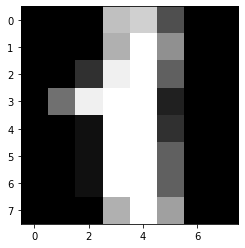

In [75]:
previsao = classifier.predict([img])
#Deu certo!
plt.imshow(digits.images[int(previsao)], cmap='gray')


#### Utilizando o modelo de Regressão logística

In [86]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)
previsao_reg = logreg.predict([img])

print(previsao_reg)

[1]


C:\Users\Jean\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
